In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
color = sns.color_palette()
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
pd.options.mode.chained_assignment = None

In [3]:
funding_data = pd.read_csv("C:/Users/NITHIN/Desktop/256/Project/Individual/startup_funding.csv")
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [5]:
print("Size of data(Rows, Columns)",funding_data.shape)

Size of data(Rows, Columns) (2372, 10)


## Data Cleaning & Data Preprocessing

In [6]:
total = funding_data.isnull().sum().sort_values(ascending = False)
percent = ((funding_data.isnull().sum()/funding_data.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head()

,Total,Percent %
Remarks,1953,82.335582
SubVertical,936,39.460371
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106


In [7]:
del funding_data["Remarks"]
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


In [8]:
funding_data["AmountInUSD"] = funding_data["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
funding_data["AmountInUSD"] = pd.to_numeric(funding_data["AmountInUSD"])
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


## What is the Indian funding ecosystem trend with time?

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201606     98
201508     98
201507     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


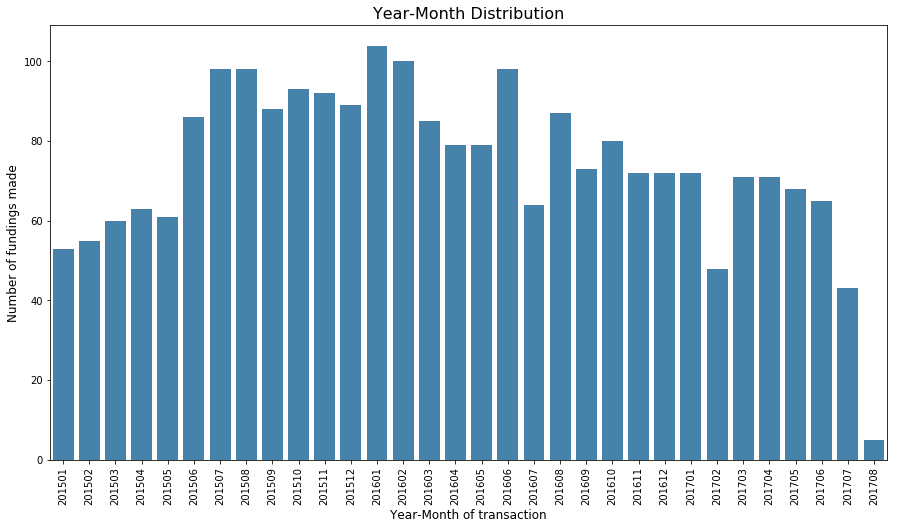

In [12]:
funding_data['Date'][funding_data['Date']=='12/05.2015'] = '12/05/2015'
funding_data['Date'][funding_data['Date']=='13/04.2015'] = '13/04/2015'
funding_data['Date'][funding_data['Date']=='15/01.2015'] = '15/01/2015'
funding_data['Date'][funding_data['Date']=='22/01//2015'] = '22/01/2015'
funding_data["yearmonth"] = (pd.to_datetime(funding_data['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(funding_data['Date'],format='%d/%m/%Y').dt.month)
temp = funding_data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = funding_data['yearmonth'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

## How much funding does Indian startups generally get?

### Maximum Funding

In [13]:
print("Maximum funding to a Startups is : ",funding_data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  1400000000.0


In [14]:
funding_data[funding_data.AmountInUSD == 1400000000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703


In [15]:
funding_data[funding_data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
821,821,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
1787,1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2218,2218,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,201503
2276,2276,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN,201502


### Minimum Funding

In [16]:
print("Minimum funding to a Startups is : ",funding_data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  16000.0


In [17]:
funding_data[funding_data.AmountInUSD == 16000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
2345,2345,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2346,2346,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2347,2347,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2348,2348,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2349,2349,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


### Average Funding

In [18]:
print("On Average indian startups got funding of : ",funding_data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  12031073.099016393


Total startups funded :  2001
Swiggy           7
UrbanClap        6
Paytm            5
NoBroker         5
Medinfi          5
Jugnoo           5
Capital Float    4
Niki.ai          4
Flipkart         4
Voonik           4
Name: StartupName, dtype: int64


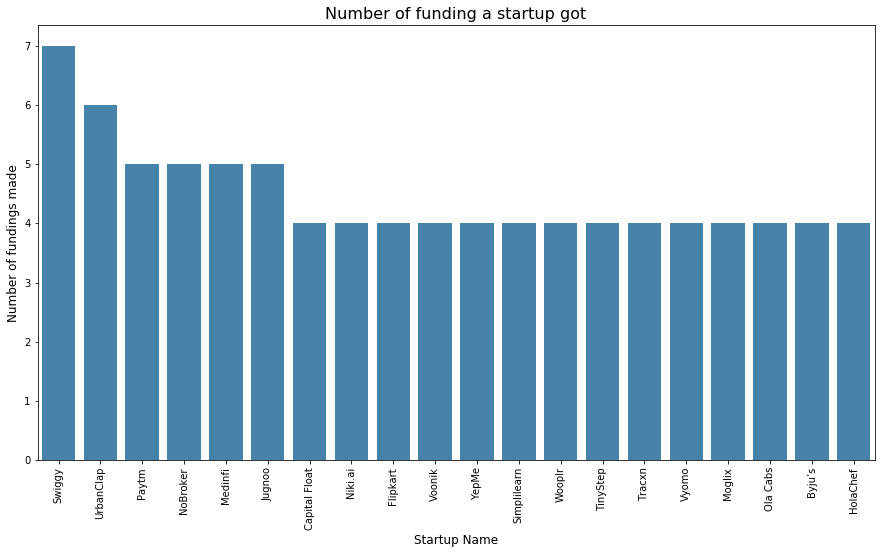

In [19]:
print("Total startups funded : ", len(funding_data["StartupName"].unique()))
print(funding_data["StartupName"].value_counts().head(10))
startupname = funding_data['StartupName'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(startupname.index, startupname.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a startup got", fontsize=16)
plt.show()

## What type of industries does generally investors favour?

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64


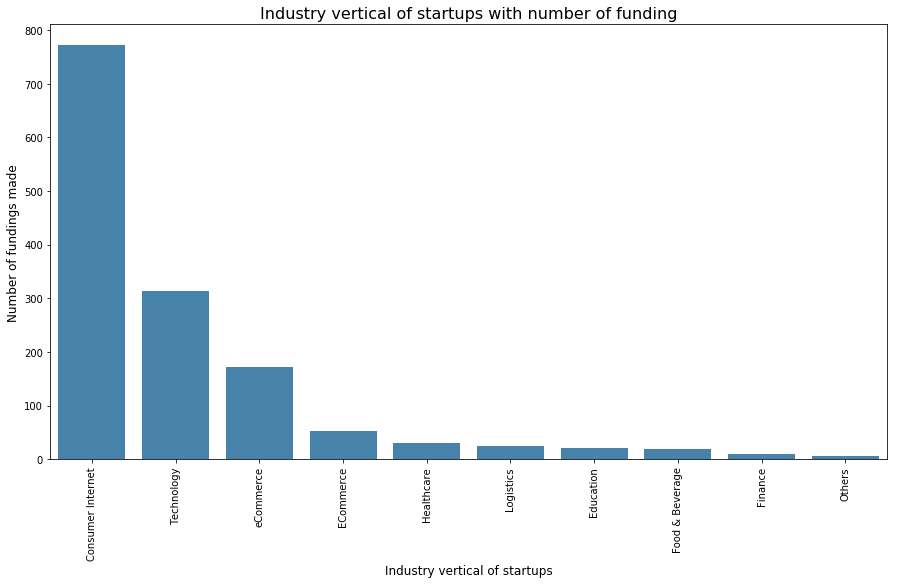

In [20]:
industry = funding_data['IndustryVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

## Does location play a major role in funding?

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64


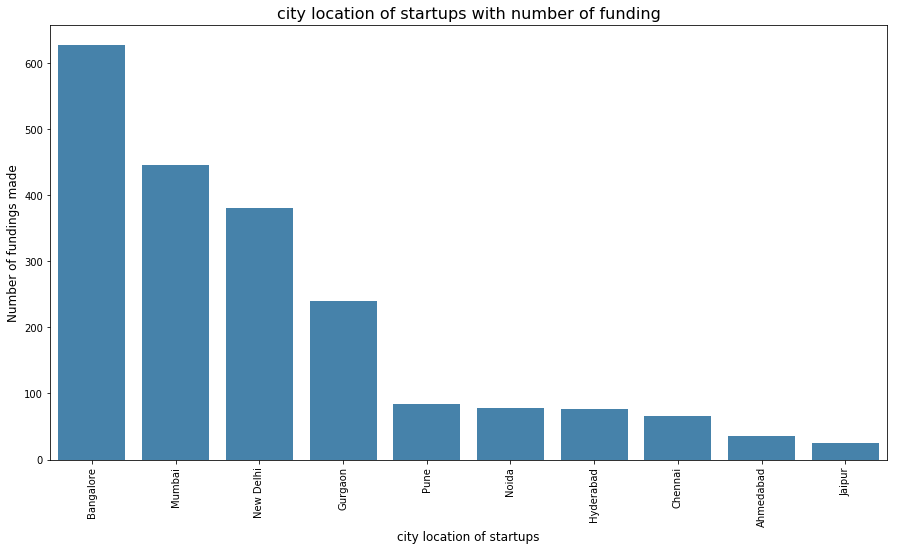

In [21]:
city = funding_data['CityLocation'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(city.index, city.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

Text(0.5, 1.0, 'Distribution of Startups across Top cities')

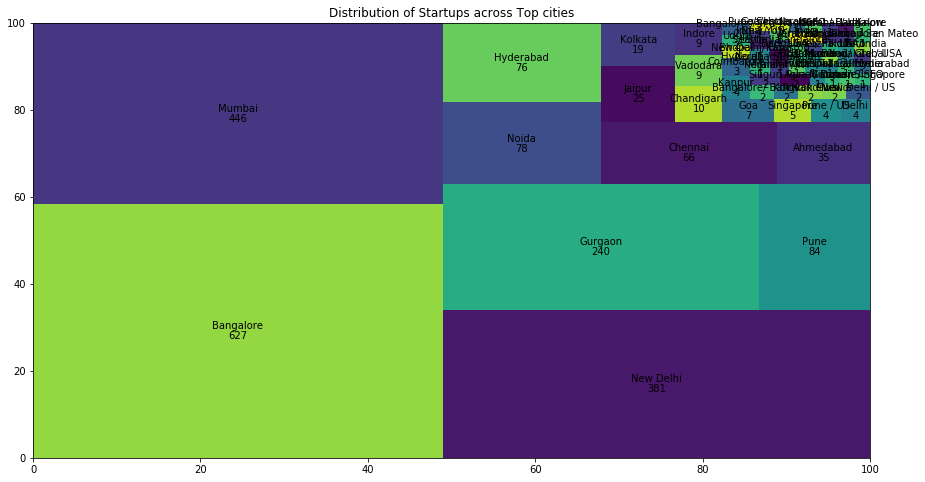

In [22]:
plt.figure(figsize=(15,8))
count = funding_data['CityLocation'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Startups across Top cities')

## Who are all the important investors in the ecosystem?

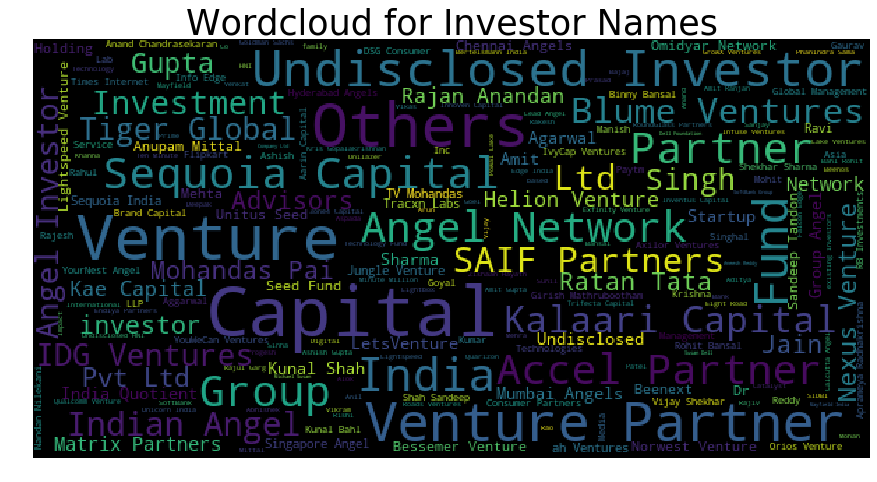

In [23]:
from wordcloud import WordCloud

names = funding_data["InvestorsName"][~pd.isnull(funding_data["InvestorsName"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

Undisclosed Investors       99
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
RoundGlass Partners         10
Brand Capital               10
SAIF Partners                9
Accel Partners               9
Name: InvestorsName, dtype: int64


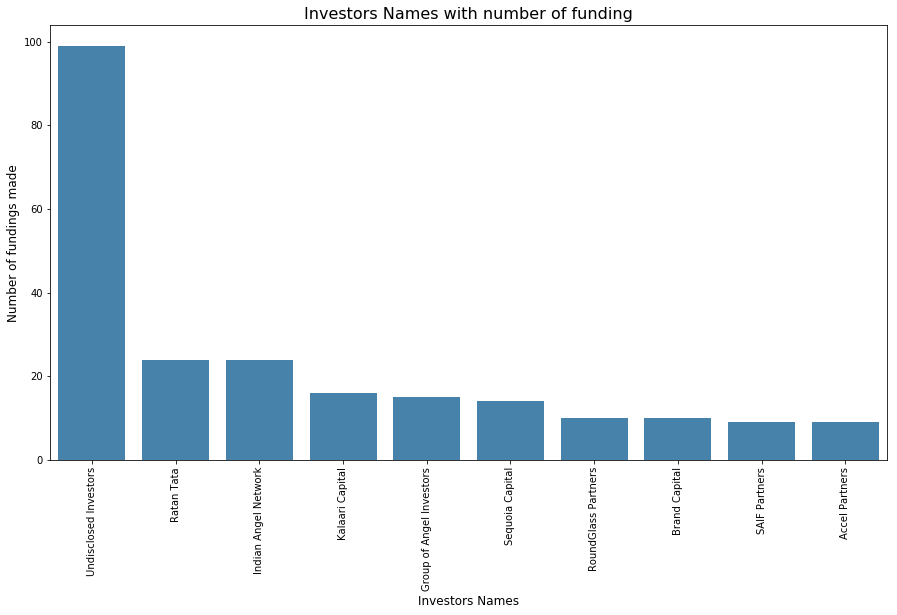

In [24]:
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
investors = funding_data['InvestorsName'].value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## What are different types of funding for startups?

In [25]:
investment = funding_data['InvestmentType'].value_counts()
print(investment)

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Debt Funding         1
Crowd Funding        1
PrivateEquity        1
Crowd funding        1
Name: InvestmentType, dtype: int64


In [28]:
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'
investment = funding_data['InvestmentType'].value_counts()
print(investment)
temp = funding_data["InvestmentType"].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Types of investment funding with %')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: InvestmentType, dtype: int64
